A partir de los datos de iris:

Ejercicio 1:

- Carga los datos originales
- Utiliza PCA para reducir la dimensionalidad de los datos. No reemplaces X con el resultado, crea una nueva X_pca. Utiliza PCA(2) y otra con PCA(3)
- Utiliza Kmeans para agrupar y predecir las clases de los nuevos datos.
- Compara los resultados para PCA(2) y PCA(3) con las clases originales (y_real).
- ¿Es mejor PCA(2) o PCA(3)?

Ejercicio 2: 

- Repite el proceso con T-SNE y DBSCAN. ¿Cuál da mejores resultados?


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
seed = 42

In [2]:
iris = load_iris()

scaler = StandardScaler()
X = scaler.fit_transform(iris.data) # Estandarizamos los datos
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [3]:
df = pd.concat([pd.DataFrame(X, columns=iris['feature_names']), pd.DataFrame(y, columns=['target'])], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [4]:
np.unique(y)
# Vemos todas las clases que hay

array([0, 1, 2])

Probamos con PCA(n_components=2)

In [5]:
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(X)

In [6]:
X_pca2.shape[1]
# Comprobamos que hemos reducido a dos dimensiones

2

<AxesSubplot:>

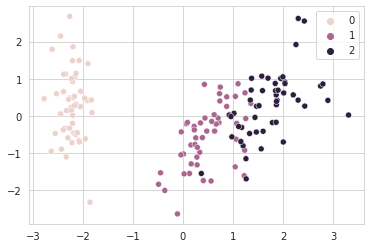

In [7]:
sns.scatterplot(x=X_pca2[:, 0], y=X_pca2[:, 1], hue=y)
# Vemos la distribución de los datos originales estandarizados

In [8]:
df = pd.concat([pd.DataFrame(X_pca2), pd.DataFrame(y, columns=['target'])], axis=1)
# Creamos un dataframe con los datos estandarizados para poder filtrar por clase

In [9]:
centro0 = df[df.target == 0].iloc[:, :-1].mean().to_numpy()
centro1 = df[df.target == 1].iloc[:, :-1].mean().to_numpy()
centro2 = df[df.target == 2].iloc[:, :-1].mean().to_numpy()
centros = np.concatenate([centro0, centro1, centro2]).reshape(3, 2)
# Vamos a inicializar los centroides manualmente. Cada centroide tendra la posición de la media por clase

In [10]:
kmeans2 = KMeans(n_clusters=3, init=centros).fit(X_pca2)

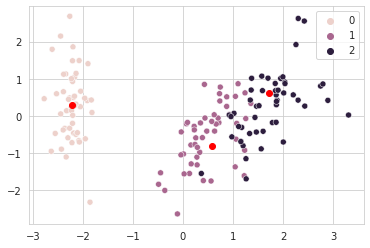

In [11]:
fig, ax = plt.subplots()
sns.scatterplot(ax=ax, x=X_pca2[:, 0], y=X_pca2[:, 1], hue=y)

for center in kmeans2.cluster_centers_:
    ax.plot(center[0], center[1], 'ro')
# Vemos la distribución de los centroides

In [12]:
y_pred2 = kmeans2.predict(X_pca2)
# Realizamos la predicción

In [13]:
print(f'El score es de {round(accuracy_score(y, y_pred2), 2)}')

El score es de 0.83


Realizamos el mismo proceso anterior con PCA(3)

In [14]:
pca = PCA(n_components=3)
X_pca3 = pca.fit_transform(X)

In [15]:
X_pca3.shape[1]
# Comprobamos que hemos reducido a tres dimensiones

3

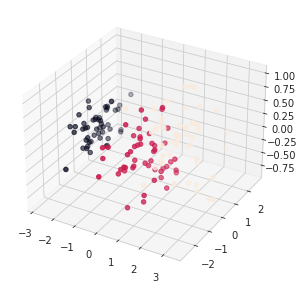

In [16]:
#%matplotlib qt -> Incluir para poder rotar el gráfico

fig, ax = plt.subplots(figsize=(20, 5), subplot_kw={'projection': '3d'})
ax.scatter(X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2], c=y)


In [17]:
df = pd.concat([pd.DataFrame(X_pca3), pd.DataFrame(y, columns=['target'])], axis=1)

In [18]:
centro0 = df[df.target == 0].iloc[:, :-1].mean().to_numpy()
centro1 = df[df.target == 1].iloc[:, :-1].mean().to_numpy()
centro2 = df[df.target == 2].iloc[:, :-1].mean().to_numpy()
centros = np.concatenate([centro0, centro1, centro2]).reshape(3, 3)
# También inicializamos los centroides manualmente

In [19]:
kmeans3 = KMeans(n_clusters=3, init=centros).fit(X_pca3)

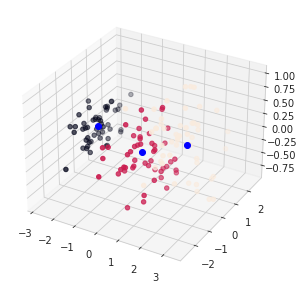

In [20]:
#%matplotlib qt -> Incluir para poder rotar el gráfico

fig, ax = plt.subplots(figsize=(20, 5), subplot_kw={'projection': '3d'})
ax.scatter(X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2], c=y)

for center in kmeans3.cluster_centers_:
    ax.plot(center[0], center[1], center[2], 'bo')

In [21]:
y_pred3 = kmeans3.predict(X_pca3)

In [22]:
print(f'El score es de {round(accuracy_score(y, y_pred3), 2)}')
# Vemos que PCA(2) y PCA(3) han dado los mismos resultados en este caso

El score es de 0.83


### Vamos a probar con T_SNE(n_components=2) y DBSCAN

In [23]:
tsne = TSNE(n_components=2, random_state=seed)
X_tsne = tsne.fit_transform(X)
# Modificamos la dimensión de nuestros datos con t-sne

In [24]:
db = DBSCAN(eps=1.1, min_samples=5).fit(X_tsne)
# Calculamos los clusters con epsilon = 1.1 para que aparezcan tres clases como en los datos originales

<AxesSubplot:>

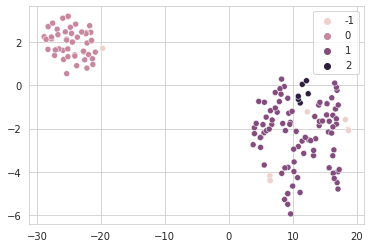

In [25]:
fig, ax = plt.subplots()
sns.scatterplot(ax=ax, x=X_tsne[:, 0], y=X_tsne[:, 1], hue=db.labels_)
# Vemos como han acabado los clusters

In [26]:
y_preddb = DBSCAN(eps=1.1, min_samples=5).fit_predict(X_tsne)
# Vamos a realizar la predicción

In [27]:
print(f'El score es de {accuracy_score(y, y_preddb)}')

El score es de 0.64
